# Radiative Loss Tests

In [1]:
import os
os.environ['XUVTOP'] = '/Users/willbarnes/ssw/packages/chianti/dbase/'

import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
import matplotlib.colors
import astropy.units as u
import astropy.constants as const
import fiasco
import hissw
import ChiantiPy.core as ch

%matplotlib inline

/Users/willbarnes/anaconda/envs/fiasco/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


 using cli
 using CLI for selections


/Users/willbarnes/anaconda/envs/fiasco/lib/python3.6/site-packages/ChiantiPy-0.7.dev697-py3.6.egg/ChiantiPy/core/IpyMspectrum.py:9: UserWarning: ipyparallel not found. You won't be able to use the ipymspectrum module
  warnings.warn("ipyparallel not found. You won't be able to use the ipymspectrum module")


In [2]:
t = np.logspace(6.1,8,100)*u.K

In [3]:
wavelength = np.linspace(100,500,100) * u.angstrom

In [34]:
el = fiasco.Element('iron',t,abundance_filename='sun_coronal_1992_feldman')

In [6]:
el[26]

CHIANTI Database Ion
---------------------
Name: Fe 27
Element: iron (26)
Charge: +26
Number of Levels: 0
Number of Transitions: 0

Temperature range: [0.01 MK, 1000.0 MK]

HDF5 Database: /Users/willbarnes/.fiasco/chianti_dbase.h5
Using Datasets:
  ioneq: chianti
  abundance: sun_coronal_1992_feldman
  ip: chianti

In [7]:
c = fiasco.IonCollection(*[fiasco.Ion(i,t) for i in fiasco.list_ions()])

In [8]:
tmax = []
for ion in c:
    imax = t[np.argmax(ion.ioneq)]
    tmax.append(imax)

In [9]:
tmax

[<Quantity 10000. K>,
 <Quantity 81113.08307897 K>,
 <Quantity 10000. K>,
 <Quantity 50941.38014816 K>,
 <Quantity 830217.56813197 K>,
 <Quantity 10000. K>,
 <Quantity 22570.19719634 K>,
 <Quantity 145082.87784959 K>,
 <Quantity 4750810.16210279 K>,
 <Quantity 10000. K>,
 <Quantity 17886.49529057 K>,
 <Quantity 102353.1021899 K>,
 <Quantity 327454.91628777 K>,
 <Quantity 17073526.47470689 K>,
 <Quantity 10000. K>,
 <Quantity 25353.6449397 K>,
 <Quantity 50941.38014816 K>,
 <Quantity 205651.23083487 K>,
 <Quantity 657933.22465757 K>,
 <Quantity 77426368.26811278 K>,
 <Quantity 10000. K>,
 <Quantity 22570.19719634 K>,
 <Quantity 72208.09018385 K>,
 <Quantity 114975.69953977 K>,
 <Quantity 367837.97718286 K>,
 <Quantity 1047615.75278967 K>,
 <Quantity 1.7475284e+08 K>,
 <Quantity 10000. K>,
 <Quantity 28480.35868436 K>,
 <Quantity 72208.09018385 K>,
 <Quantity 145082.87784959 K>,
 <Quantity 183073.82802954 K>,
 <Quantity 585702.08180567 K>,
 <Quantity 1668100.53720006 K>,
 <Quantity 4.430

In [11]:
const.m_e

<<class 'astropy.constants.codata2014.CODATA2014'> name='Electron mass' value=9.10938356e-31 uncertainty=1.1e-38 unit='kg' reference='CODATA 2014'>

In [12]:
const.alpha

<<class 'astropy.constants.codata2014.CODATA2014'> name='Fine-structure constant' value=0.0072973525664 uncertainty=1.7e-12 unit='' reference='CODATA 2014'>

In [13]:
const.h

<<class 'astropy.constants.codata2014.CODATA2014'> name='Planck constant' value=6.62607004e-34 uncertainty=8.1e-42 unit='J s' reference='CODATA 2014'>

In [14]:
const.k_B

<<class 'astropy.constants.codata2014.CODATA2014'> name='Boltzmann constant' value=1.38064852e-23 uncertainty=7.9e-30 unit='J / K' reference='CODATA 2014'>

In [4]:
foo = fiasco.Ion('H 1', t)

In [23]:
foo._itoh

h/continuum/itoh -- v8.0.2

Fields
------
a  -- fit coefficient

Footer
------
Analytic fit coefficients as a function of scaled temperature and energy for calculating the relativistic free-free Gaunt factor
From Itoh, N., et al., ApJS, 2000, 128, 125

In [24]:
foo._itoh['a'].shape

(11, 11)

In [6]:
wmesh,tmesh = np.meshgrid(wavelength.value,t.value)
itoh_fiasco = foo._gaunt_factor_free_free_itoh(wavelength)

In [41]:
itoh[~np.isnan(itoh)].shape

(10000,)

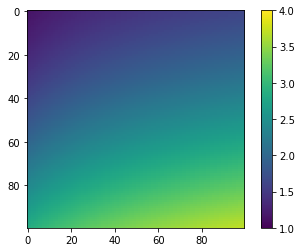

In [8]:
plt.imshow(itoh_fiasco,vmin=1,vmax=4)
plt.colorbar()

In [58]:
foo._gffgu

continuum/gffgu -- v8.0.2

Fields
------
gamma_squared  -- scaled temperature
gaunt_factor  -- free-free Gaunt factor
u  -- scaled frequency

Footer
------
Free-Free Emission Gaunt factors for Maxwellian electrons
as a function of scaled temperature and scaled frequency.
v1.0.0, Sutherland 1997

In [11]:
sutherland_fiasco = foo._gaunt_factor_free_free_sutherland(wavelength)

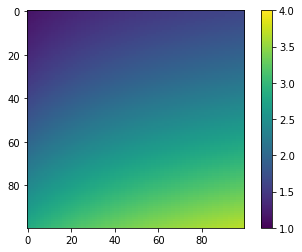

In [16]:
plt.imshow(sutherland_fiasco,vmin=1,vmax=4)
plt.colorbar()

In [11]:
ssw = hissw.ScriptMaker(ssw_packages=['chianti'], ssw_paths=['chianti'],)

In [ ]:
script = """
"""

In [14]:
ch_cont = ch.continuum('h_1',foo.temperature.value,)

In [17]:
sutherland_chp = ch_cont.sutherland_gaunt_factor(wavelength.value)

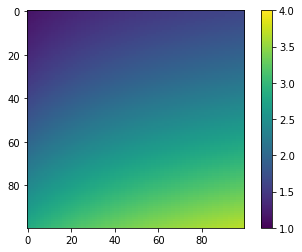

In [18]:
plt.imshow(sutherland_chp,vmin=1,vmax=4)
plt.colorbar()

In [23]:
itoh_chp = ch_cont.itoh_gaunt_factor(wavelength.value)

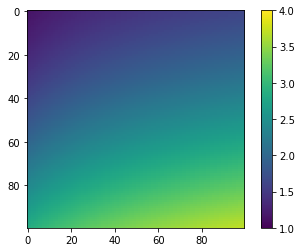

In [15]:
plt.imshow(gf_itoh,vmin=1,vmax=4)
plt.colorbar()

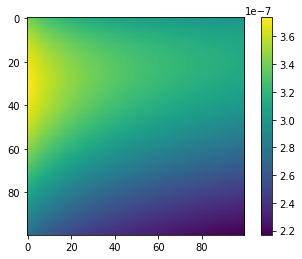

In [41]:
plt.imshow(np.fabs(itoh_chp - itoh_fiasco)/itoh_chp,
           #norm=matplotlib.colors.SymLogNorm(1e-10,vmin=-1e-6,vmax=1e-6)
          )
plt.colorbar()

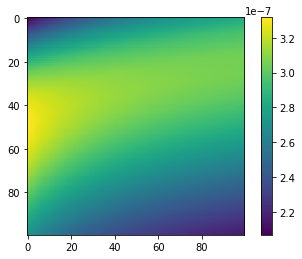

In [19]:
plt.imshow(np.fabs(sutherland_chp - sutherland_fiasco)/sutherland_chp,
           #norm=matplotlib.colors.SymLogNorm(1e-10,vmin=-1e-6,vmax=1e-6)
          )
plt.colorbar()